In [1]:
%pip install scanpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.9/169.9 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 101.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 4.1 MB/s eta 0:00:00


In [2]:
%pip install leidenalg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 97.3 MB/s eta 0:00:00


In [3]:
%pip install python-igraph

Cell 1: Load the Clustered Data

Load the AnnData object that now contains all our hard work: normalized data, dimensionality reduction, and cluster labels.

In [4]:
import scanpy as sc
import pandas as pd

# Load the clustered data
adata = sc.read('pbmc3k_clustered.h5ad')

print("✅ Clustered data loaded.")

✅ Clustered data loaded.


Cell 2: Find Marker Genes

This is the key step. We'll ask Scanpy to compare each cluster to all the others and find genes that are significantly upregulated. We'll use the Welch t-test for this statistical comparison.

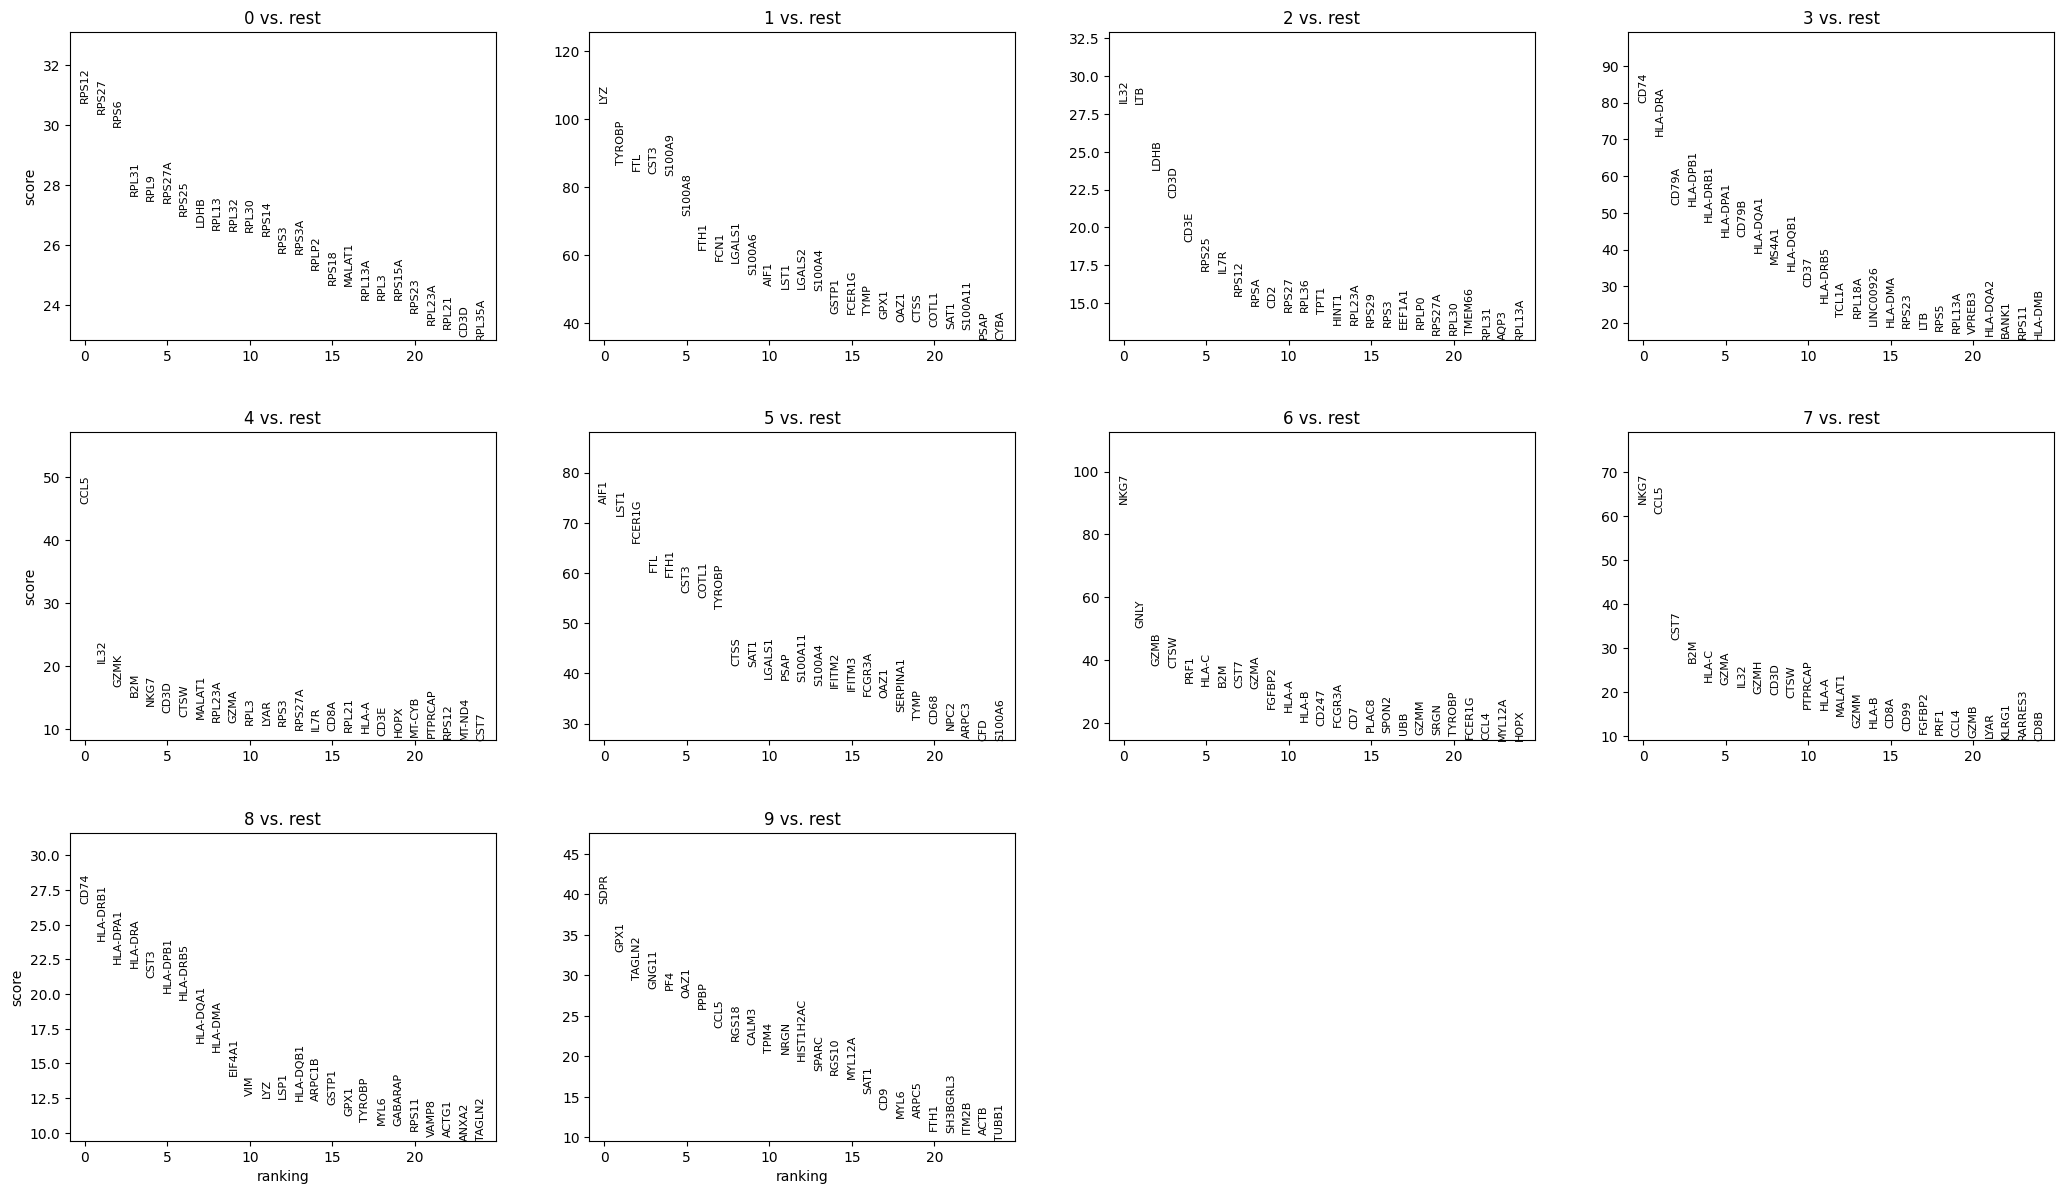

In [5]:
# Find marker genes for each cluster
# This function populates adata.uns['rank_genes_groups']
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')

# Show the top marker genes as a table
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

This plot shows the top genes that define each cluster. The y-axis shows a score (like a t-statistic), indicating how specific that gene is to the cluster. For example, you should see that MS4A1 is a top gene for one cluster and CD79A is also high—these are classic B cell markers. Another cluster will be defined by NKG7 and GNLY—hallmarks of Natural Killer (NK) cells.

Cell 3: The Dot Plot (A Beautiful Summary)

A dot plot is one of the best ways to visualize marker genes. It shows two pieces of information at once:

Color: The average expression of the gene in a cluster (higher is brighter).

Dot Size: The percentage of cells in the cluster that express the gene.

Let's create one for a set of known immune cell markers.

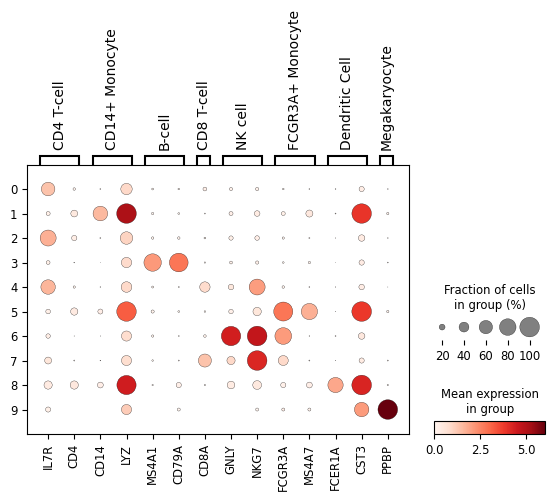

In [6]:
# Define a dictionary of known marker genes for major immune cell types
marker_genes = {
    'CD4 T-cell': ['IL7R', 'CD4'],
    'CD14+ Monocyte': ['CD14', 'LYZ'],
    'B-cell': ['MS4A1', 'CD79A'],
    'CD8 T-cell': ['CD8A'],
    'NK cell': ['GNLY', 'NKG7'],
    'FCGR3A+ Monocyte': ['FCGR3A', 'MS4A7'],
    'Dendritic Cell': ['FCER1A', 'CST3'],
    'Megakaryocyte': ['PPBP']
}

# Create the dot plot
sc.pl.dotplot(adata, marker_genes, groupby='leiden')

By looking at this plot, you can now play detective.

1. Find the row for MS4A1. The cluster with the big, bright dot is your B-cell cluster.

2. Find the row for CD14 and LYZ. The cluster with bright dots there is your CD14+ Monocyte cluster.

3. ...and so on! You can now go through this list and assign an identity to nearly every cluster.

Cell 4: Rename the Clusters

Now that we've identified the cell types, let's officially rename them. We'll create a new metadata column in .obs called cell_type.



In [10]:
# Get the current cluster names
print("Current categories in adata.obs['leiden']:", adata.obs['leiden'].cat.categories)

# Create a mapping from the old cluster ID to the new cell type name
# NOTE: Your cluster numbers might be different! Adjust this mapping based on YOUR dot plot.
new_cluster_names = {
    '0': 'CD4 T-cell 1',
    '1': 'CD14+ Monocyte',
    '2': 'CD8 T-cell',
    '3': 'B-cell',
    '4': 'CD4 T-cell 2',
    '5': 'NK cell',
    '6': 'FCGR3A+ Monocyte',
    '7': 'Dendritic Cell',
    '8': 'Megakaryocyte',
    '9': 'Unknown' # Added mapping for cluster 9. Please replace 'Unknown' with the correct cell type based on your dot plot.
}

# Rename the categories
adata.rename_categories('leiden', list(new_cluster_names.values()))

# Copy this to a new 'cell_type' column for clarity
adata.obs['cell_type'] = adata.obs['leiden']

print("✅ Clusters have been annotated with cell type names.")

Current categories in adata.obs['leiden']: Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')
✅ Clusters have been annotated with cell type names.


Cell 5: The Final Masterpiece UMAP

Let's create our final UMAP, but this time with our new, human-readable cell type labels. This is the plot you'd put in a presentation!

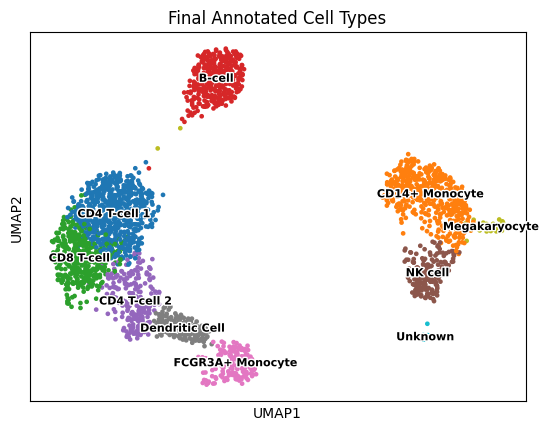

In [11]:
# Plot the final, annotated UMAP
sc.pl.umap(adata, color='cell_type', legend_loc='on data',
           title='Final Annotated Cell Types',
           legend_fontsize=8, legend_fontoutline=2)

Cell 6: Save the Final Annotated Result

This is the final, fully analyzed, and annotated dataset. It's a valuable resource you can always come back to.

In [12]:
# Save the final, fully annotated AnnData object
adata.write('pbmc3k_final_annotated.h5ad')

print("🎉 Project complete! Final annotated object saved.")

🎉 Project complete! Final annotated object saved.
